<a id="import"></a>
# <center>Import Modules</center>

In [1]:
#Modules
import cv2
import os
import numpy as np
import pandas as pd
#import matplotlib

<a id="import"></a>
# <center>JPEG Compression on Original Data</center>

Run to create compressed data from original data

In [ ]:
#getting image paths of the original data
input_data = r'Data\\Original'
img_paths = []
folders = os.listdir(input_data)
#looping through class folders
for folder in folders:
    fpath=os.path.join(input_data,folder)
    images = os.listdir(fpath)
    #appending the path containing the class and image name
    for img in images:
        img_paths.append(os.path.join(folder,img))

#lopping through different quality ratings to be applied to all images and storing them in a new folder.
for quality in range(0,100,10):
    for img in img_paths:
        input_name = os.path.join(input_data,img)
        #new images stored in folder corresponding to quality
        save_name = os.path.join(r'data\\Q='+str(quality),img)
        #create directory is it does not exist
        if not os.path.exists(os.path.split(save_name)[0]):
            os.makedirs(os.path.split(save_name)[0])
        #reading original image and writing compressed image
        temp = cv2.imread(input_name)
        cv2.imwrite(save_name, temp, [cv2.IMWRITE_JPEG_QUALITY, quality])

<a id="import"></a>
# <center>Average Size of Images at Quality Level</center>

Run module to obtain the average size of the images at different quality levels and save the results in an excel file

In [4]:
#Creating df containing filepaths and quality levels.
filepaths = []
labels=[]
quality = []
data_loc = r'Data\\'
qlist = os.listdir(data_loc)
for q in qlist:
    q_loc = os.path.join(data_loc,q)
    classlist=sorted(os.listdir(q_loc))
    for klass in classlist:
        classpath=os.path.join(q_loc, klass)
        flist=os.listdir(classpath)        
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            quality.append(q)
Fseries=pd.Series(filepaths, name='filepaths')
Qseries = pd.Series(quality, name='quality')
df=pd.concat([Fseries, Qseries], axis=1)

#looping though quality levels to obtain average size of images
size_list_bytes = []
for q in qlist:
    temp_df = df.loc[df['quality'] == q]
    n,s = 0,0
    #iretare over paths
    for path in temp_df['filepaths']:
        #get hex length
        s+=os.path.getsize(path)
        n+=1
    size_list_bytes.append(int(s/n))


#Formatting data into df and saving in excel.
size_series = pd.Series(size_list_bytes, name='size')
quality_series = pd.Series(qlist, name='quality')
size_df=pd.concat([quality_series, size_series], axis=1)
print(size_df)
size_df.to_excel('Information\\Compression Size.xlsx', index=False)

     quality   size
0   Original  16965
1        Q=0   1589
2       Q=10   1939
3       Q=20   2495
4       Q=30   3055
5       Q=40   3575
6       Q=50   4107
7       Q=60   4698
8       Q=70   5673
9       Q=80   7393
10      Q=90  13039


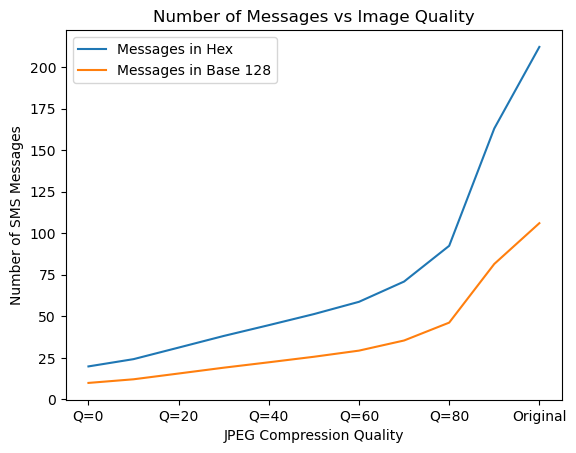

In [6]:
size_df = pd.read_excel('Information\\Compression Size.xlsx')

#each byte is represented as 2 hexadecimals.
#each SMS message has 160 characters.

size_df["Messages in Hex"] = size_df["size"]*2/160

#each byte can be represented as 1 character in base 128.
size_df["Messages in Base 128"] = size_df["size"]/160

ax = size_df.sort_values(by=["size"]).plot(x='quality',y=['Messages in Hex', 'Messages in Base 128'])
ax.set_ylabel("Number of SMS Messages")
ax.set_xlabel('JPEG Compression Quality')
ax.set_title("Number of Messages vs Image Quality")

size_df.to_excel('Information\\Compression Size.xlsx', index=False)